In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('customer_churn.csv', na_values=['?', -999])

In [3]:
df.head()

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   17-08-2017   
1   32      F     5K0N3X1            City   Premium Membership   28-08-2017   
2   44      F     1F2TCL3            Town        No Membership   11-11-2016   
3   37      M     VJGJ33N            City        No Membership   29-10-2016   
4   31      F     SVZXCWB            City        No Membership   12-09-2017   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                     NaN    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation  ... avg_time_spent avg_transaction_value  \
0                 NaN  ...         300.63              53005.25   
1             Desktop  ...         306.34              12838.38   
2             Desktop  ...         516.16              21027.00   
3             Desktop  ...          53.27              25239.56   
4          Smartphone  ...         113.13              24483.66   

   avg_frequency_login_days  points_in_wallet  used_special_discount  \
0                        17            781.75                    Yes   
1                        10               NaN                    Yes   
2                        22            500.69                     No   
3                         6            567.66                     No   
4                        16            663.06                     No   

  offer_application_preference  past_complaint     complaint_status  \
0                          Yes              No       Not Applicable   
1                           No             Yes               Solved   
2                          Yes             Yes  Solved in Follow-up   
3                          Yes             Yes             Unsolved   
4                          Yes             Yes               Solved   

                   feedback churn_risk_score  
0  Products always in Stock                0  
1     Quality Customer Care                0  
2              Poor Website                1  
3              Poor Website                1  
4              Poor Website                1  

[5 rows x 23 columns]

In [4]:
df.tail()

age gender security_no region_category  membership_category  \
36987   46      F     6F51HFO             NaN     Basic Membership   
36988   29      F     21KSM8Y            Town     Basic Membership   
36989   23      F     XK1IM9H             NaN     Basic Membership   
36990   53      M     K6VTP1Z         Village  Platinum Membership   
36991   35      M     LBX0GLR            Town    Silver Membership   

      joining_date joined_through_referral referral_id  \
36987   21-09-2017                      No    xxxxxxxx   
36988   27-06-2016                      No    xxxxxxxx   
36989   11-09-2016                     Yes     CID3838   
36990   15-06-2017                      No    xxxxxxxx   
36991   23-10-2015                      No    xxxxxxxx   

          preferred_offer_types medium_of_operation  ... avg_time_spent  \
36987  Credit/Debit Card Offers             Desktop  ...    -650.682758   
36988            Without Offers          Smartphone  ...    -638.123421   
36989     Gift Vouchers/Coupons             Desktop  ...     154.940000   
36990     Gift Vouchers/Coupons          Smartphone  ...     482.610000   
36991     Gift Vouchers/Coupons             Desktop  ...      79.180000   

      avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
36987              27277.68                         6        639.510000   
36988              11069.71                        28        527.990000   
36989              38127.56                     Error        680.470000   
36990               2378.86                        20        197.264414   
36991               2189.68                     Error        719.970000   

       used_special_discount offer_application_preference  past_complaint  \
36987                     No                          Yes             Yes   
36988                    Yes                           No              No   
36989                     No                          Yes             Yes   
36990                    Yes                          Yes              No   
36991                    Yes                           No              No   

               complaint_status               feedback churn_risk_score  
36987  No Information Available    No reason specified                1  
36988            Not Applicable  Poor Customer Service                1  
36989                  Unsolved           Poor Website                1  
36990            Not Applicable    No reason specified                0  
36991            Not Applicable  Quality Customer Care                0  

[5 rows x 23 columns]

In [5]:
df.isna().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
referral_id                        0
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login           1999
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
df.isna().any(axis=1).sum()

np.int64(17420)

<Axes: >

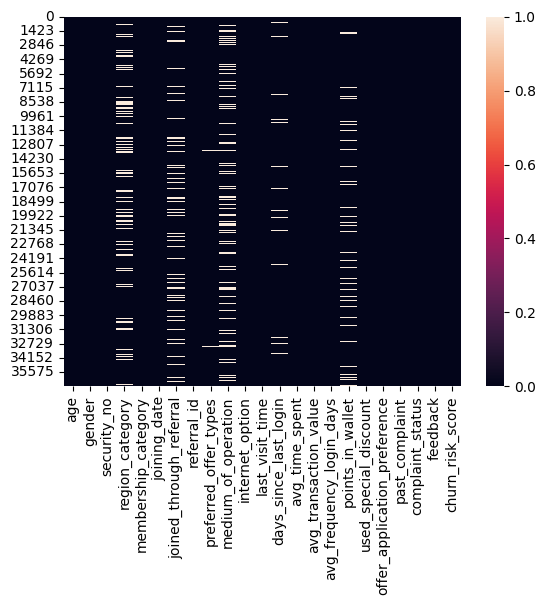

In [7]:
import seaborn as sns

sns.heatmap(df.isna())

In [8]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()

age  days_since_last_login  avg_time_spent  \
age                    1.000000              -0.002017        0.001531   
days_since_last_login -0.002017               1.000000       -0.090335   
avg_time_spent         0.001531              -0.090335        1.000000   
avg_transaction_value -0.000473              -0.017037        0.020888   
points_in_wallet       0.000205               0.000364       -0.000648   
churn_risk_score       0.006124               0.016773       -0.014263   

                       avg_transaction_value  points_in_wallet  \
age                                -0.000473          0.000205   
days_since_last_login              -0.017037          0.000364   
avg_time_spent                      0.020888         -0.000648   
avg_transaction_value               1.000000          0.087950   
points_in_wallet                    0.087950          1.000000   
churn_risk_score                   -0.218012         -0.307439   

                       churn_risk_score  
age                            0.006124  
days_since_last_login          0.016773  
avg_time_spent                -0.014263  
avg_transaction_value         -0.218012  
points_in_wallet              -0.307439  
churn_risk_score               1.000000

In [9]:
len(df.security_no.unique())

36992

In [10]:
df.preferred_offer_types.unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [11]:
df['joined_through_referral'] = df.apply(lambda x: 'No' if x['referral_id'] == 'xxxxxxxx' else (np.nan if x['referral_id'] == 'No referral' else 'Yes'), axis=1)

In [12]:
df.rename(columns={'security_no':'customer_id'}, inplace=True)

In [13]:
df.columns

Index(['age', 'gender', 'customer_id', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [14]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

C:\Users\astar\AppData\Local\Temp\ipykernel_29328\313696224.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['joining_date'] = pd.to_datetime(df['joining_date'])


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df.loc[df['medium_of_operation'].str.contains(r'\?', na=False), 'medium_of_operation'] = np.nan

train_df = df[df['medium_of_operation'].notna()].copy()
test_df = df[df['medium_of_operation'].isna()].copy()

encoder = LabelEncoder()
train_df['medium_of_operation_encoded'] = encoder.fit_transform(train_df['medium_of_operation'])

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

for col in datetime_cols:
    train_df[col] = train_df[col].astype('int64') // 10**9
    test_df[col] = test_df[col].astype('int64') // 10**9 

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('medium_of_operation')

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    
    label_encoders[col] = le

    test_df[col] = test_df[col].astype(str).apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

clf = RandomForestClassifier(random_state=42)
clf.fit(train_df.drop(columns=['medium_of_operation', 'medium_of_operation_encoded']), 
        train_df['medium_of_operation_encoded'])

test_df['medium_of_operation_encoded'] = clf.predict(test_df.drop(columns=['medium_of_operation']))

test_df['medium_of_operation'] = encoder.inverse_transform(test_df['medium_of_operation_encoded'])

df.loc[test_df.index, 'medium_of_operation'] = test_df['medium_of_operation']

if 'medium_of_operation_encoded' in df.columns:
    df.drop(columns=['medium_of_operation_encoded'], inplace=True)

In [16]:
df = df[df['days_since_last_login'] >= 0]


In [17]:
df.drop(df[df['avg_time_spent'] < 0].index, inplace=True)
df.drop(df[df['points_in_wallet'] == 'Error'].index, inplace=True)
df['points_in_wallet'] = pd.to_numeric(df['points_in_wallet'], errors='coerce')
df.drop(df[df['points_in_wallet'] < 0].index, inplace=True)
df.drop(df[df['avg_frequency_login_days'] == 'Error'].index, inplace=True)
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df.drop(df[df['avg_frequency_login_days'] < 0].index, inplace=True)


In [18]:
df['region_category'] = df['region_category'].fillna(
    df.groupby('membership_category')['region_category'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a missing value mask BEFORE encoding
missing_mask = df['preferred_offer_types'].isna()

# Step 2: Copy dataframe and encode
df_temp = df.copy()
features = ['referral_id', 'medium_of_operation', 'internet_option']
target = 'preferred_offer_types'

encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    df_temp[col] = df_temp[col].astype(str)
    df_temp[col] = le.fit_transform(df_temp[col])
    encoders[col] = le

# Step 3: Split based on original missing_mask
train_data = df_temp[~missing_mask]
test_data = df_temp[missing_mask]

# Step 4: Train & predict
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(train_data[features], train_data[target])

preds = clf.predict(test_data[features])
preds_decoded = encoders[target].inverse_transform(preds)

# Step 5: Fill the missing values
df.loc[missing_mask, 'preferred_offer_types'] = preds_decoded



In [20]:
df.dropna(axis=1, how='any', inplace=True)

In [21]:
df.shape

(29488, 21)

<Axes: xlabel='churn_risk_score', ylabel='count'>

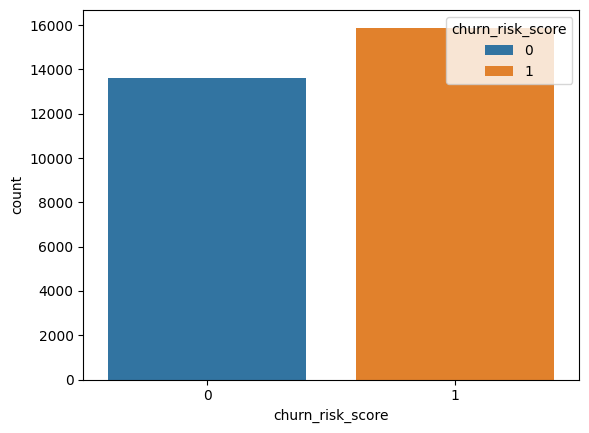

In [22]:
sns.countplot(x='churn_risk_score', data=df, hue='churn_risk_score')

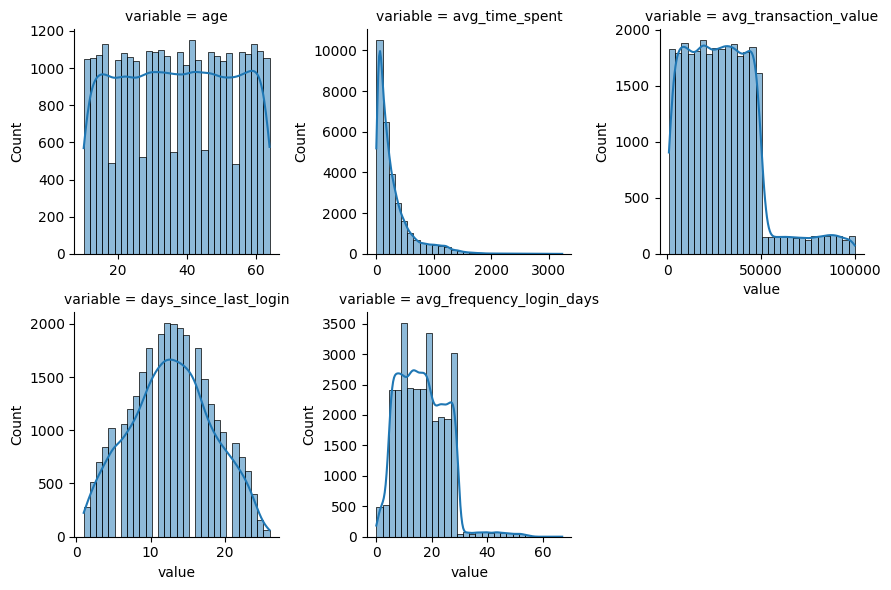

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'avg_time_spent', 'avg_transaction_value', 'days_since_last_login', 'avg_frequency_login_days']

g = sns.FacetGrid(pd.melt(df[numerical_columns]), col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "value", kde=True, bins=30)

plt.show()

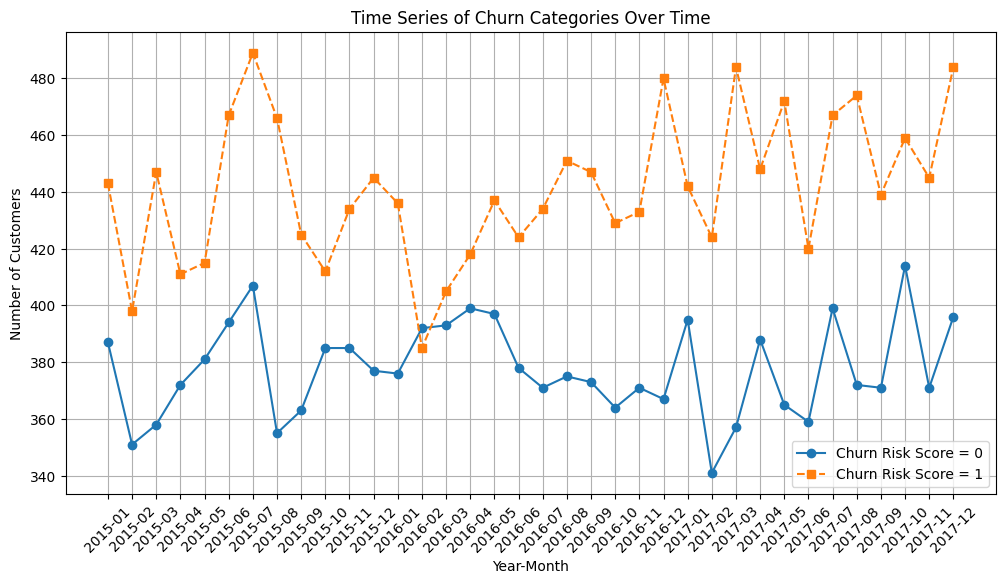

In [24]:
df['year_month'] = df['joining_date'].dt.to_period('M')

df_churn_counts = df.groupby(['year_month', 'churn_risk_score']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(df_churn_counts.index.astype(str), df_churn_counts[0], marker='o', linestyle='-', label='Churn Risk Score = 0')
plt.plot(df_churn_counts.index.astype(str), df_churn_counts[1], marker='s', linestyle='--', label='Churn Risk Score = 1')

plt.xlabel("Year-Month")
plt.ylabel("Number of Customers")
plt.title("Time Series of Churn Categories Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

c:\Users\astar\OneDrive\Desktop\Data Minin\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


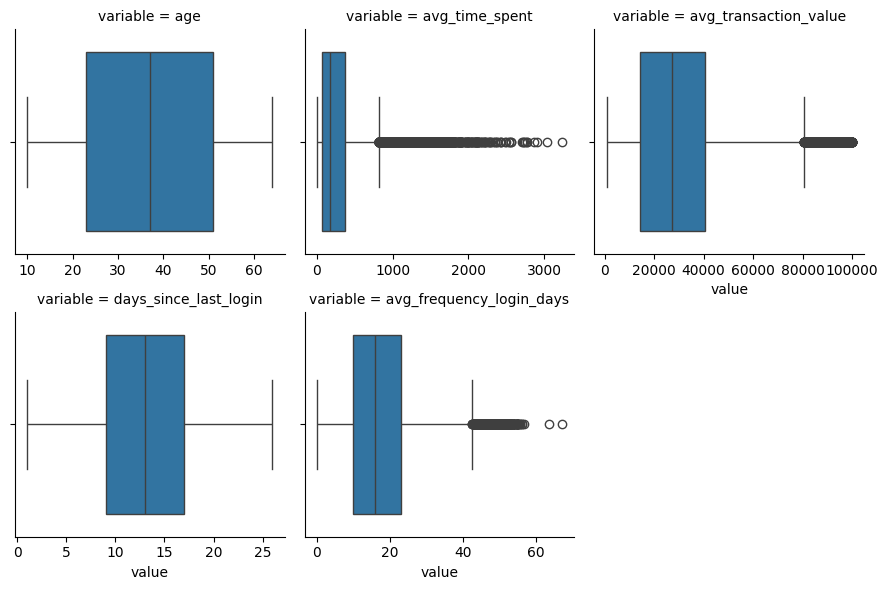

In [25]:
numerical_columns = ['age', 'avg_time_spent', 'avg_transaction_value', 'days_since_last_login', 'avg_transaction_value', 'avg_frequency_login_days']

g = sns.FacetGrid(pd.melt(df[numerical_columns]), col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()


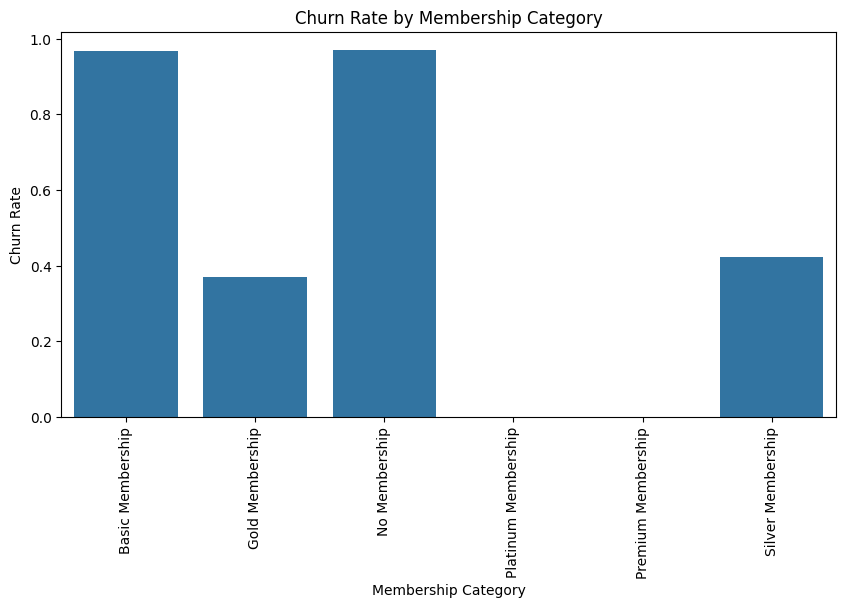

In [26]:
plt.figure(figsize=(10, 5))
churn_rate_by_membership = df.groupby("membership_category")["churn_risk_score"].mean()
sns.barplot(x=churn_rate_by_membership.index, y=churn_rate_by_membership.values)
plt.xlabel("Membership Category")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Membership Category")
plt.xticks(rotation=90)
plt.show()

- Higher-tier memberships (Gold, Silver) tend to retain customers better.
- Lower-tier memberships (Basic, No Membership) have extremely high churn, meaning they may need incentives to stay (discounts, better benefits, engagement strategies).
- Missing data for Platinum/Premium should be checked to confirm if it’s truly zero churn or a data issue.

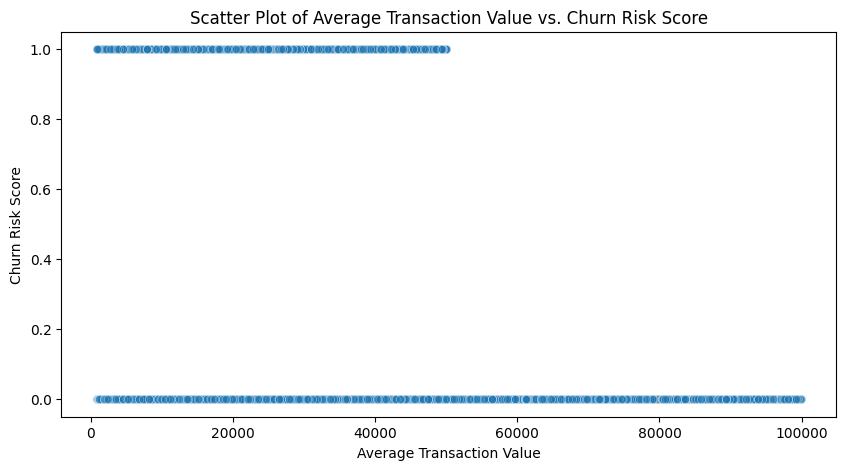

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="avg_transaction_value", y="churn_risk_score", alpha=0.5)
plt.xlabel("Average Transaction Value")
plt.ylabel("Churn Risk Score")
plt.title("Scatter Plot of Average Transaction Value vs. Churn Risk Score")
plt.show()

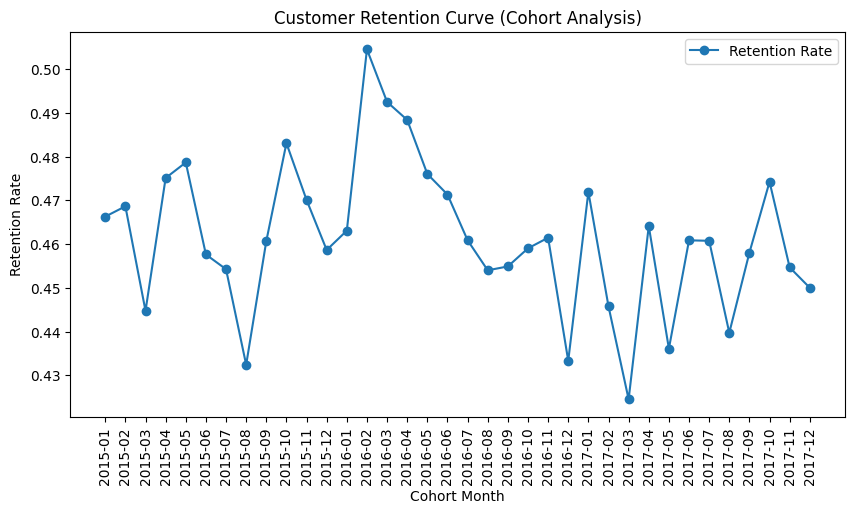

In [28]:
df['cohort_month'] = df['joining_date'].dt.to_period('M')
cohort_counts = df.groupby(['cohort_month', 'churn_risk_score']).size().unstack(fill_value=0)
cohort_counts['total'] = cohort_counts.sum(axis=1)
cohort_counts['retention_rate'] = cohort_counts[0] / cohort_counts['total']

plt.figure(figsize=(10, 5))
plt.plot(cohort_counts.index.astype(str), cohort_counts['retention_rate'], marker='o', linestyle='-', label="Retention Rate")
plt.xlabel("Cohort Month")
plt.ylabel("Retention Rate")
plt.title("Customer Retention Curve (Cohort Analysis)")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [29]:
def full_diagnostic(df,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference(cols_to_exclude)]
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df,hue = class_col)

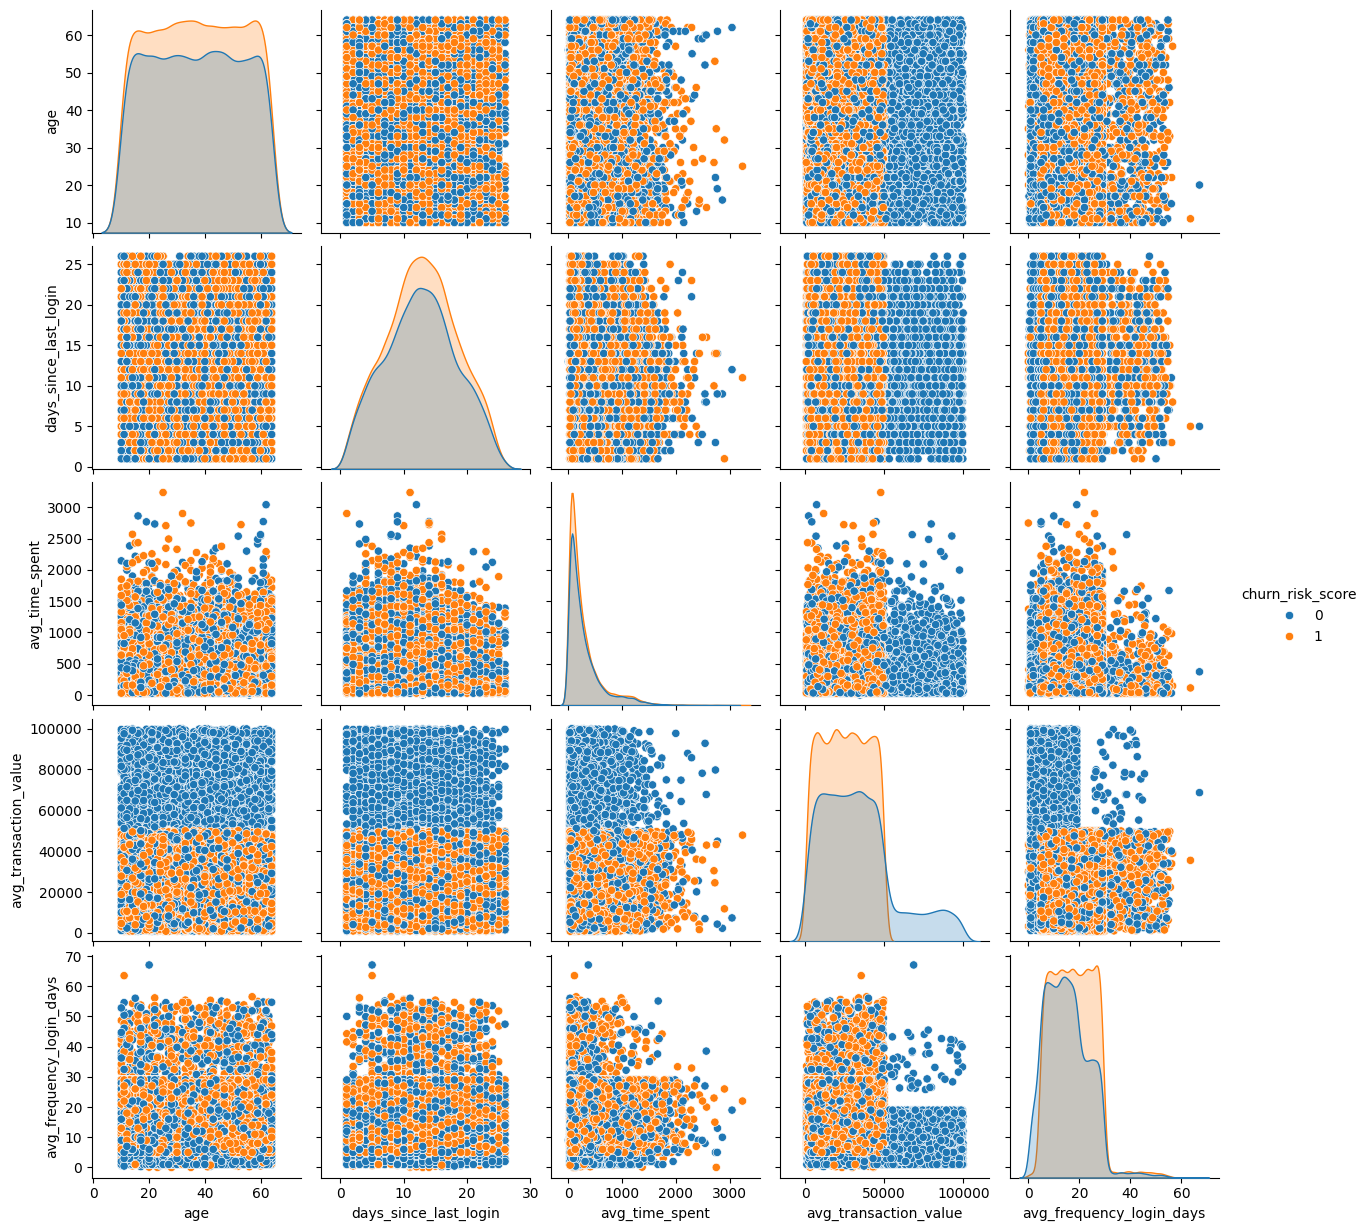

In [30]:
full_diagnostic(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date'])

In [31]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
  import seaborn as sns
  cols_to_eval.append(class_col) 
  X = df[cols_to_eval] # only selective columns
  sns.pairplot(X,hue = class_col) # plot

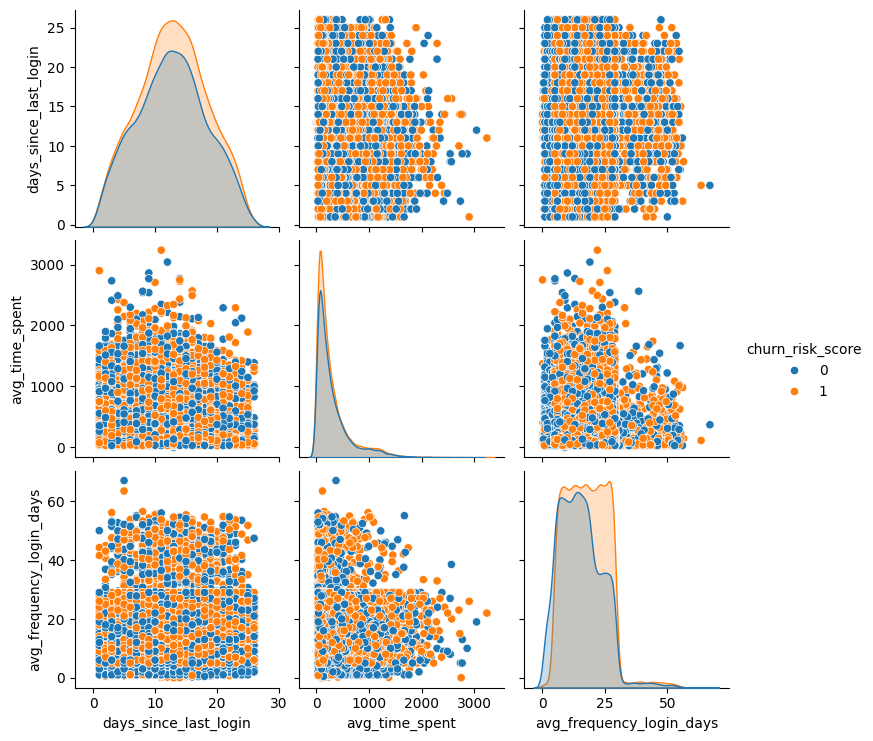

In [32]:
selected_diagnotic(df,class_col = 'churn_risk_score',cols_to_eval = ['days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days'])

## Running Logistic Regression

In [33]:
def logistic_regression(df, class_col, cols_to_exclude, scale=False):
    import statsmodels.api as sm
    import numpy as np
    from sklearn.preprocessing import StandardScaler, OrdinalEncoder

    # Separate numerical and categorical features
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Remove target and excluded columns from both
    for col in [class_col] + cols_to_exclude:
        if col in numeric_cols:
            numeric_cols.remove(col)
        if col in cat_cols:
            cat_cols.remove(col)

    # Ordinal Encoding for categorical features
    if cat_cols:
        encoder = OrdinalEncoder()
        df[cat_cols] = encoder.fit_transform(df[cat_cols])

    # Combine selected features
    feature_cols = numeric_cols + cat_cols
    X = df[feature_cols]

    # Scale if required
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    y = df[class_col]

    # Add constant manually (statsmodels needs this)
    X = sm.add_constant(X)

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    print(result.summary2())


In [34]:
logistic_regression(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month'], scale = False)

Optimization terminated successfully.
         Current function value: 0.552175
         Iterations 6
                               Results: Logit
Model:                  Logit                Method:               MLE       
Dependent Variable:     churn_risk_score     Pseudo R-squared:     0.200     
Date:                   2025-03-29 15:49     AIC:                  32601.0951
No. Observations:       29488                BIC:                  32750.3464
Df Model:               17                   Log-Likelihood:       -16283.   
Df Residuals:           29470                LL-Null:              -20351.   
Converged:              1.0000               LLR p-value:          0.0000    
No. Iterations:         6.0000               Scale:                1.0000    
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

### Run the ML Model

In [35]:
def prepare_model(df,class_col,cols_to_exclude):
  from sklearn.model_selection import train_test_split
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg 
  logreg = LogisticRegression(random_state = 42)
  logreg.fit(X_train, y_train) 
  global y_pred 
  y_pred = logreg.predict(X_test) 
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) 
  print("The area under the curve is: %0.2f"%logit_roc_auc)
     

In [37]:
prepare_model(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month'])

In [38]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      4127
           1       0.73      0.78      0.76      4720

    accuracy                           0.73      8847
   macro avg       0.73      0.73      0.73      8847
weighted avg       0.73      0.73      0.73      8847

The area under the curve is: 0.73


c:\Users\astar\OneDrive\Desktop\Data Minin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
def confusion_matrix(y_test,y_pred):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_pred)
  print(confusion_matrix)

  tn, fp, fn, tp = confusion_matrix.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [40]:
def roc_curve (logreg,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [41]:
prepare_model(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month'])

In [42]:
confusion_matrix(y_test,y_pred)

[[2791 1336]
 [1043 3677]]
TN: 2791.00
TP: 3677.00
FP: 1336.00
FN: 1043.00


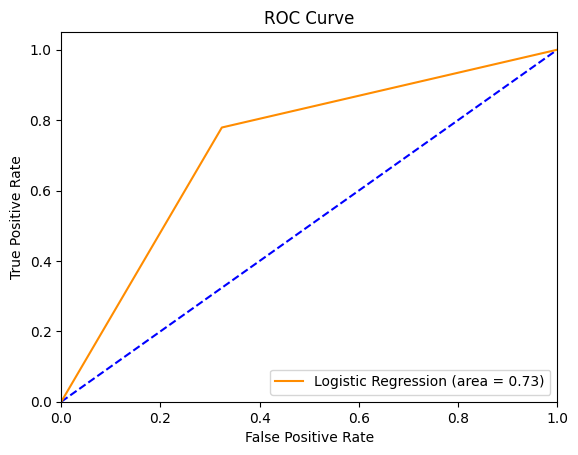

In [43]:
roc_curve (logreg,X_test,y_test)

In [44]:
df['churn_risk_score'].describe()

count    29488.000000
mean         0.538829
std          0.498498
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn_risk_score, dtype: float64

- The mean being around 0.54 means 54% of the customers are at rist (if 1 = risk). So your churn risk score is either 'Chill' or 'Paninc!' - no in betweens.

### Feature Selection

In [45]:
class_col = 'Churn_risk_score'
cols_to_exclude = ['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month']

def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
  from sklearn.feature_selection import VarianceThreshold
  import numpy as np
  from sklearn import preprocessing

  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference(cols_to_exclude)]
  X = X[X.columns.difference([class_col])]

  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold)
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [46]:
var_threshold_selection(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month'], threshold=1)

The selected features are: 
['complaint_status', 'internet_option', 'membership_category', 'offer_application_preference', 'preferred_offer_types', 'region_category', 'used_special_discount']


In [47]:
df[df.columns.difference(['complaint_status', 'internet_option', 'membership_category', 'offer_application_preference', 'preferred_offer_types', 'region_category', 'used_special_discount'])].columns

Index(['age', 'avg_frequency_login_days', 'avg_time_spent',
       'avg_transaction_value', 'churn_risk_score', 'cohort_month',
       'customer_id', 'days_since_last_login', 'feedback', 'gender',
       'joining_date', 'last_visit_time', 'medium_of_operation',
       'past_complaint', 'referral_id', 'year_month'],
      dtype='object')

In [48]:
prepare_model(df,class_col = 'churn_risk_score',cols_to_exclude=['age', 'avg_frequency_login_days', 'avg_time_spent',
       'avg_transaction_value', 'churn_risk_score', 'cohort_month',
       'customer_id', 'days_since_last_login', 'feedback', 'gender',
       'joining_date', 'last_visit_time', 'medium_of_operation',
       'past_complaint', 'referral_id', 'year_month'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      4127
           1       0.78      0.87      0.83      4720

    accuracy                           0.80      8847
   macro avg       0.81      0.80      0.80      8847
weighted avg       0.81      0.80      0.80      8847

The area under the curve is: 0.80


In [49]:
confusion_matrix(y_test, y_pred)

[[2977 1150]
 [ 593 4127]]
TN: 2977.00
TP: 4127.00
FP: 1150.00
FN: 593.00


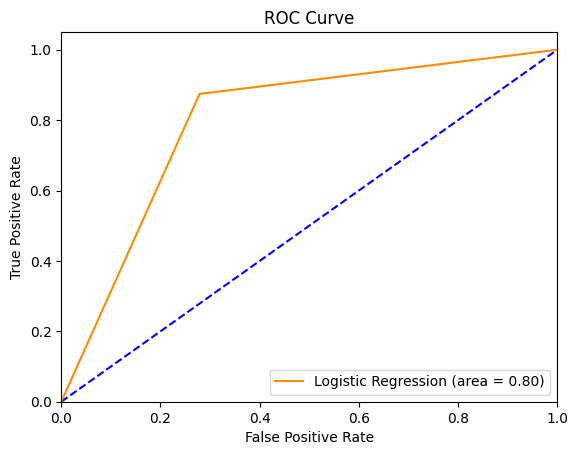

In [50]:
roc_curve (logreg,X_test,y_test)

In [51]:
# RFE for feature selection 
def rfe_selection(df,cols_to_exclude,class_col,model):
  import warnings
  warnings.filterwarnings("ignore")
  import numpy as np
  from sklearn.feature_selection import RFE

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y) # fit the model 
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [52]:
rfe_selection(df,class_col = 'churn_risk_score',cols_to_exclude=['customer_id','joining_date', 'feedback', 'year_month', 'cohort_month'],model=logreg)

The selected features are: 
['avg_frequency_login_days', 'gender', 'medium_of_operation', 'membership_category', 'offer_application_preference', 'preferred_offer_types', 'region_category', 'used_special_discount']


In [53]:
df[df.columns.difference(['avg_frequency_login_days', 'gender', 'medium_of_operation', 'membership_category', 'offer_application_preference', 'preferred_offer_types', 'region_category', 'used_special_discount'])].columns

Index(['age', 'avg_time_spent', 'avg_transaction_value', 'churn_risk_score',
       'cohort_month', 'complaint_status', 'customer_id',
       'days_since_last_login', 'feedback', 'internet_option', 'joining_date',
       'last_visit_time', 'past_complaint', 'referral_id', 'year_month'],
      dtype='object')

In [54]:
prepare_model(df,class_col = 'churn_risk_score',cols_to_exclude=['age', 'avg_time_spent', 'avg_transaction_value', 'churn_risk_score',
       'cohort_month', 'complaint_status', 'customer_id',
       'days_since_last_login', 'feedback', 'internet_option', 'joining_date',
       'last_visit_time', 'past_complaint', 'referral_id', 'year_month'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4127
           1       0.75      0.84      0.79      4720

    accuracy                           0.77      8847
   macro avg       0.77      0.76      0.76      8847
weighted avg       0.77      0.77      0.76      8847

The area under the curve is: 0.76


In [55]:
confusion_matrix(y_test, y_pred)

[[2815 1312]
 [ 754 3966]]
TN: 2815.00
TP: 3966.00
FP: 1312.00
FN: 754.00


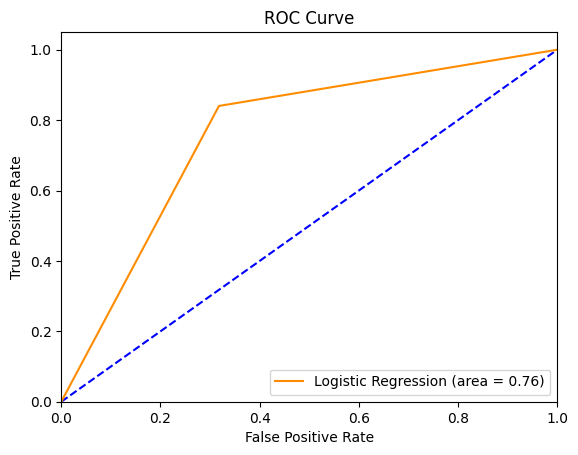

In [56]:
roc_curve (logreg,X_test,y_test)

### Decision Trees

#### Measure of Impurity

- it allows us to identify how clean a node is.
- ways to measure of impurity is using Gini Index:
    - it is 1 - the squared frequentist probability of each class.
    - 0: perfect equality
    - 1: perfect inequality

#### Steps to Implement Gini Index:

- Calculate the Gini Index of the Node and each leaf.
- Calculate the Gini of the split (weighted average of Gini of each leaf).
- If Gini of split < Gini of Node, then split. Else don't split.
- Chose to split on the feature that does the 'best possible split'.
    - Max Gini Gain = Gini Node - Gini of the split.


#### Different types of algorithms for decision trees change the measure of impurity and how they make the split:

- CART:
    - Measure of Impurity: Gini Index.
- C5.0:
    - Measure of Impurity: Entropy. (Entropy is a measure of how suprising/chaos/uncertainity the data is.)
    - 0: lowest entropy - lowest variability or 'suprise'.
    - 1: highest entropy - highest variability or 'suprise'.
- CHAID:
    - Cannot handle continuous variables - must transform them in deciles before.
    - Produces more than 2 splits - if required.
    - Split with Chi-Square Statistics.

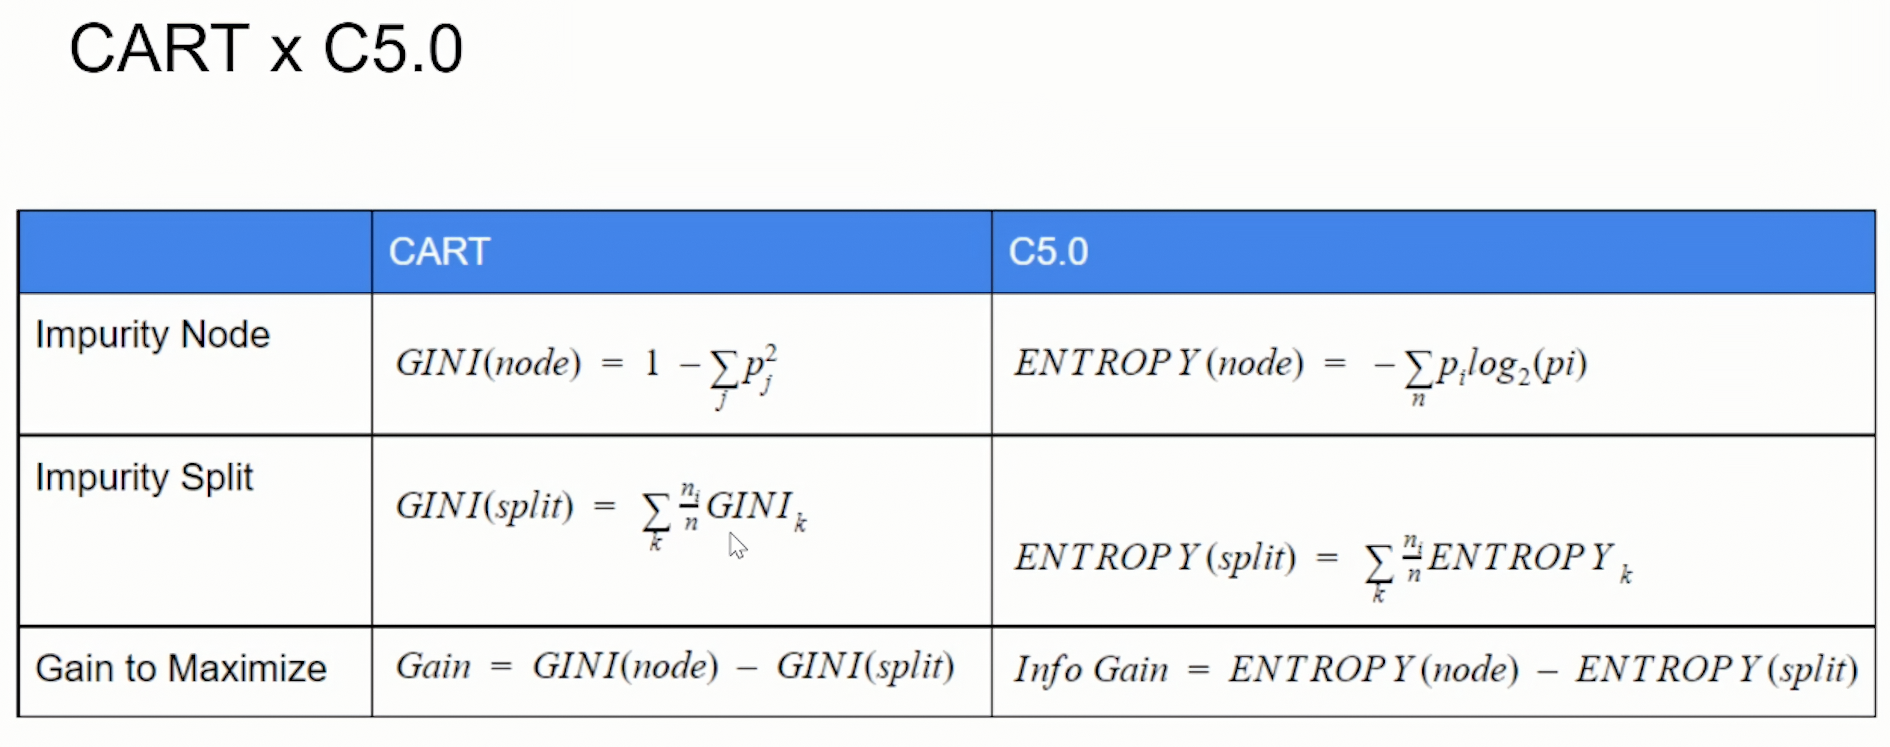


#### CHAID:

- Oldest Decision Tree Algorithm
- Can only be used with categorical independent variables (can be more than 1 category, but they need to be categorical)
    - Because of this limitation in itself it has been replaced by C5.0 and other tree algorithms.
- It tries to make the split and see what are the most significant relationships between the variables.
- The highest the Chi-squared, the lowest the correlation between the independant and dependant variable.
- It iterates through all the variables and find the ones that ae the least correlated to make the first split.
- Repeat step after a split is made.
- If at any point the split found is not statistically significant, ignore this category (merging with the previous ones.)

#### Implement SMOTE

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

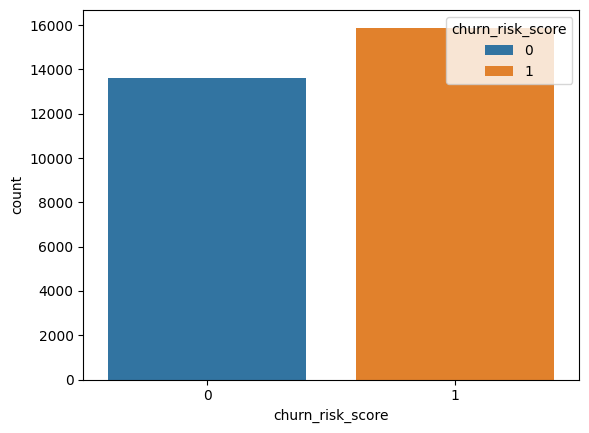

In [59]:
sns.countplot(x='churn_risk_score', data=df, hue='churn_risk_score')
plt.show()

In [60]:
def prepare_model_smote(df, class_col, cols_to_exclude):
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]
    y = df[class_col]

    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

def run_model(X_train, X_test, y_train, y_test):
    global logreg

    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)

    global y_pred
    y_pred = logreg.predict(X_test)
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % logit_roc_auc)


In [61]:
prepare_model_smote(df, class_col='churn_risk_score', cols_to_exclude=['customer_id', 'joining_date', 'feedback', 'year_month', 'cohort_month'])


In [62]:
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4127
           1       0.74      0.74      0.74      4720

    accuracy                           0.73      8847
   macro avg       0.73      0.73      0.73      8847
weighted avg       0.73      0.73      0.73      8847

The area under the curve is: 0.73


In [63]:
confusion_matrix(y_test, y_pred)

array([[2920, 1207],
       [1210, 3510]])

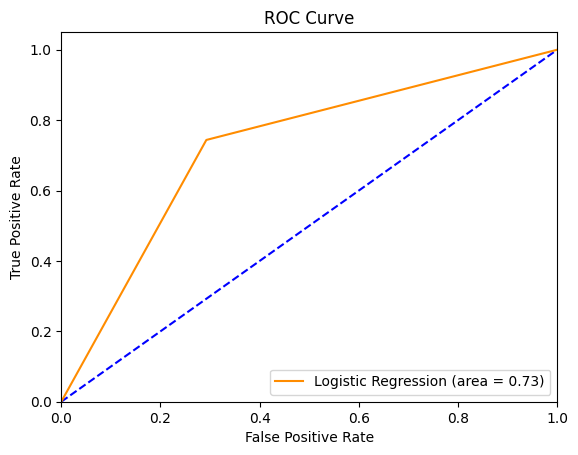

In [64]:
roc_curve (logreg,X_test,y_test)

#### Implement Decision Tree

In [65]:
def prepare_model_smote(df, class_col, cols_to_exclude):
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]
    y = df[class_col]

    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=42, sampling_strategy=1.0)
    X_train, y_train = sm.fit_resample(X_train, y_train)

def run_model(X_train, X_test, y_train, y_test):
    global dectree

    dectree = DecisionTreeClassifier(random_state=42, criterion='gini')
    dectree.fit(X_train, y_train)

    global y_pred
    y_pred = dectree.predict(X_test)
    dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % dectree_roc_auc)

In [66]:
prepare_model_smote(df, class_col='churn_risk_score', cols_to_exclude=['customer_id', 'joining_date', 'feedback', 'year_month', 'cohort_month'])
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4127
           1       0.83      0.83      0.83      4720

    accuracy                           0.82      8847
   macro avg       0.82      0.82      0.82      8847
weighted avg       0.82      0.82      0.82      8847

The area under the curve is: 0.82


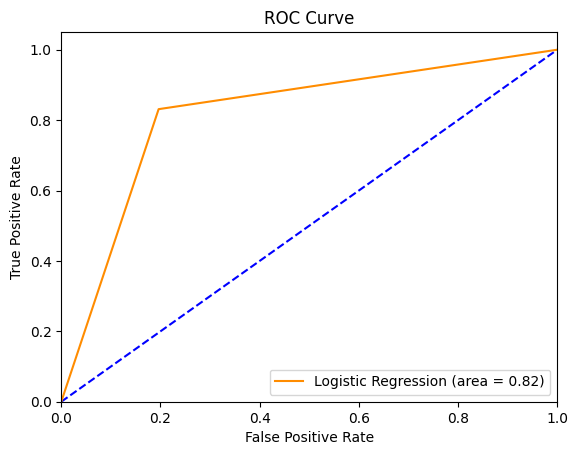

In [67]:
roc_curve (dectree,X_test,y_test)

In [68]:
def run_model(X_train, X_test, y_train, y_test):
    global dectree

    dectree = DecisionTreeClassifier(random_state=42, criterion='entropy')
    dectree.fit(X_train, y_train)

    global y_pred
    y_pred = dectree.predict(X_test)
    dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % dectree_roc_auc)

In [71]:
prepare_model_smote(df, class_col='churn_risk_score', cols_to_exclude=['customer_id', 'joining_date', 'feedback', 'year_month', 'cohort_month'])
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4127
           1       0.83      0.83      0.83      4720

    accuracy                           0.82      8847
   macro avg       0.82      0.82      0.82      8847
weighted avg       0.82      0.82      0.82      8847

The area under the curve is: 0.82


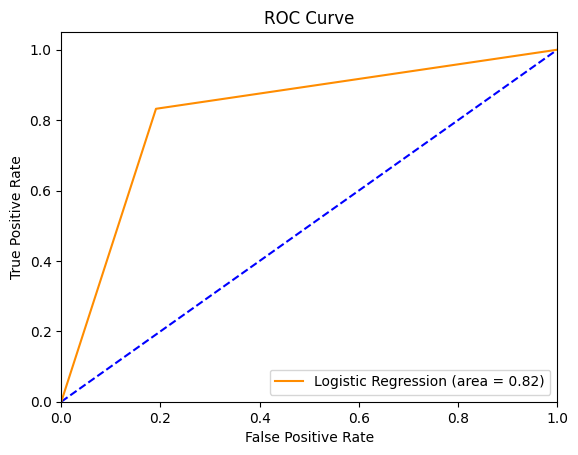

In [70]:
roc_curve (dectree,X_test,y_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[3339,  788],
       [ 792, 3928]])

In [73]:
def plot_tree(model, class_names, max_depth=None, figsize=(20, 20), fontsize=1):
    plt.figure(figsize=figsize)
    tree.plot_tree(dectree, 
                   feature_names=dectree.feature_names_in_,
                   max_depth=max_depth,
                   class_names=class_names,
                   filled=True)
    plt.show()

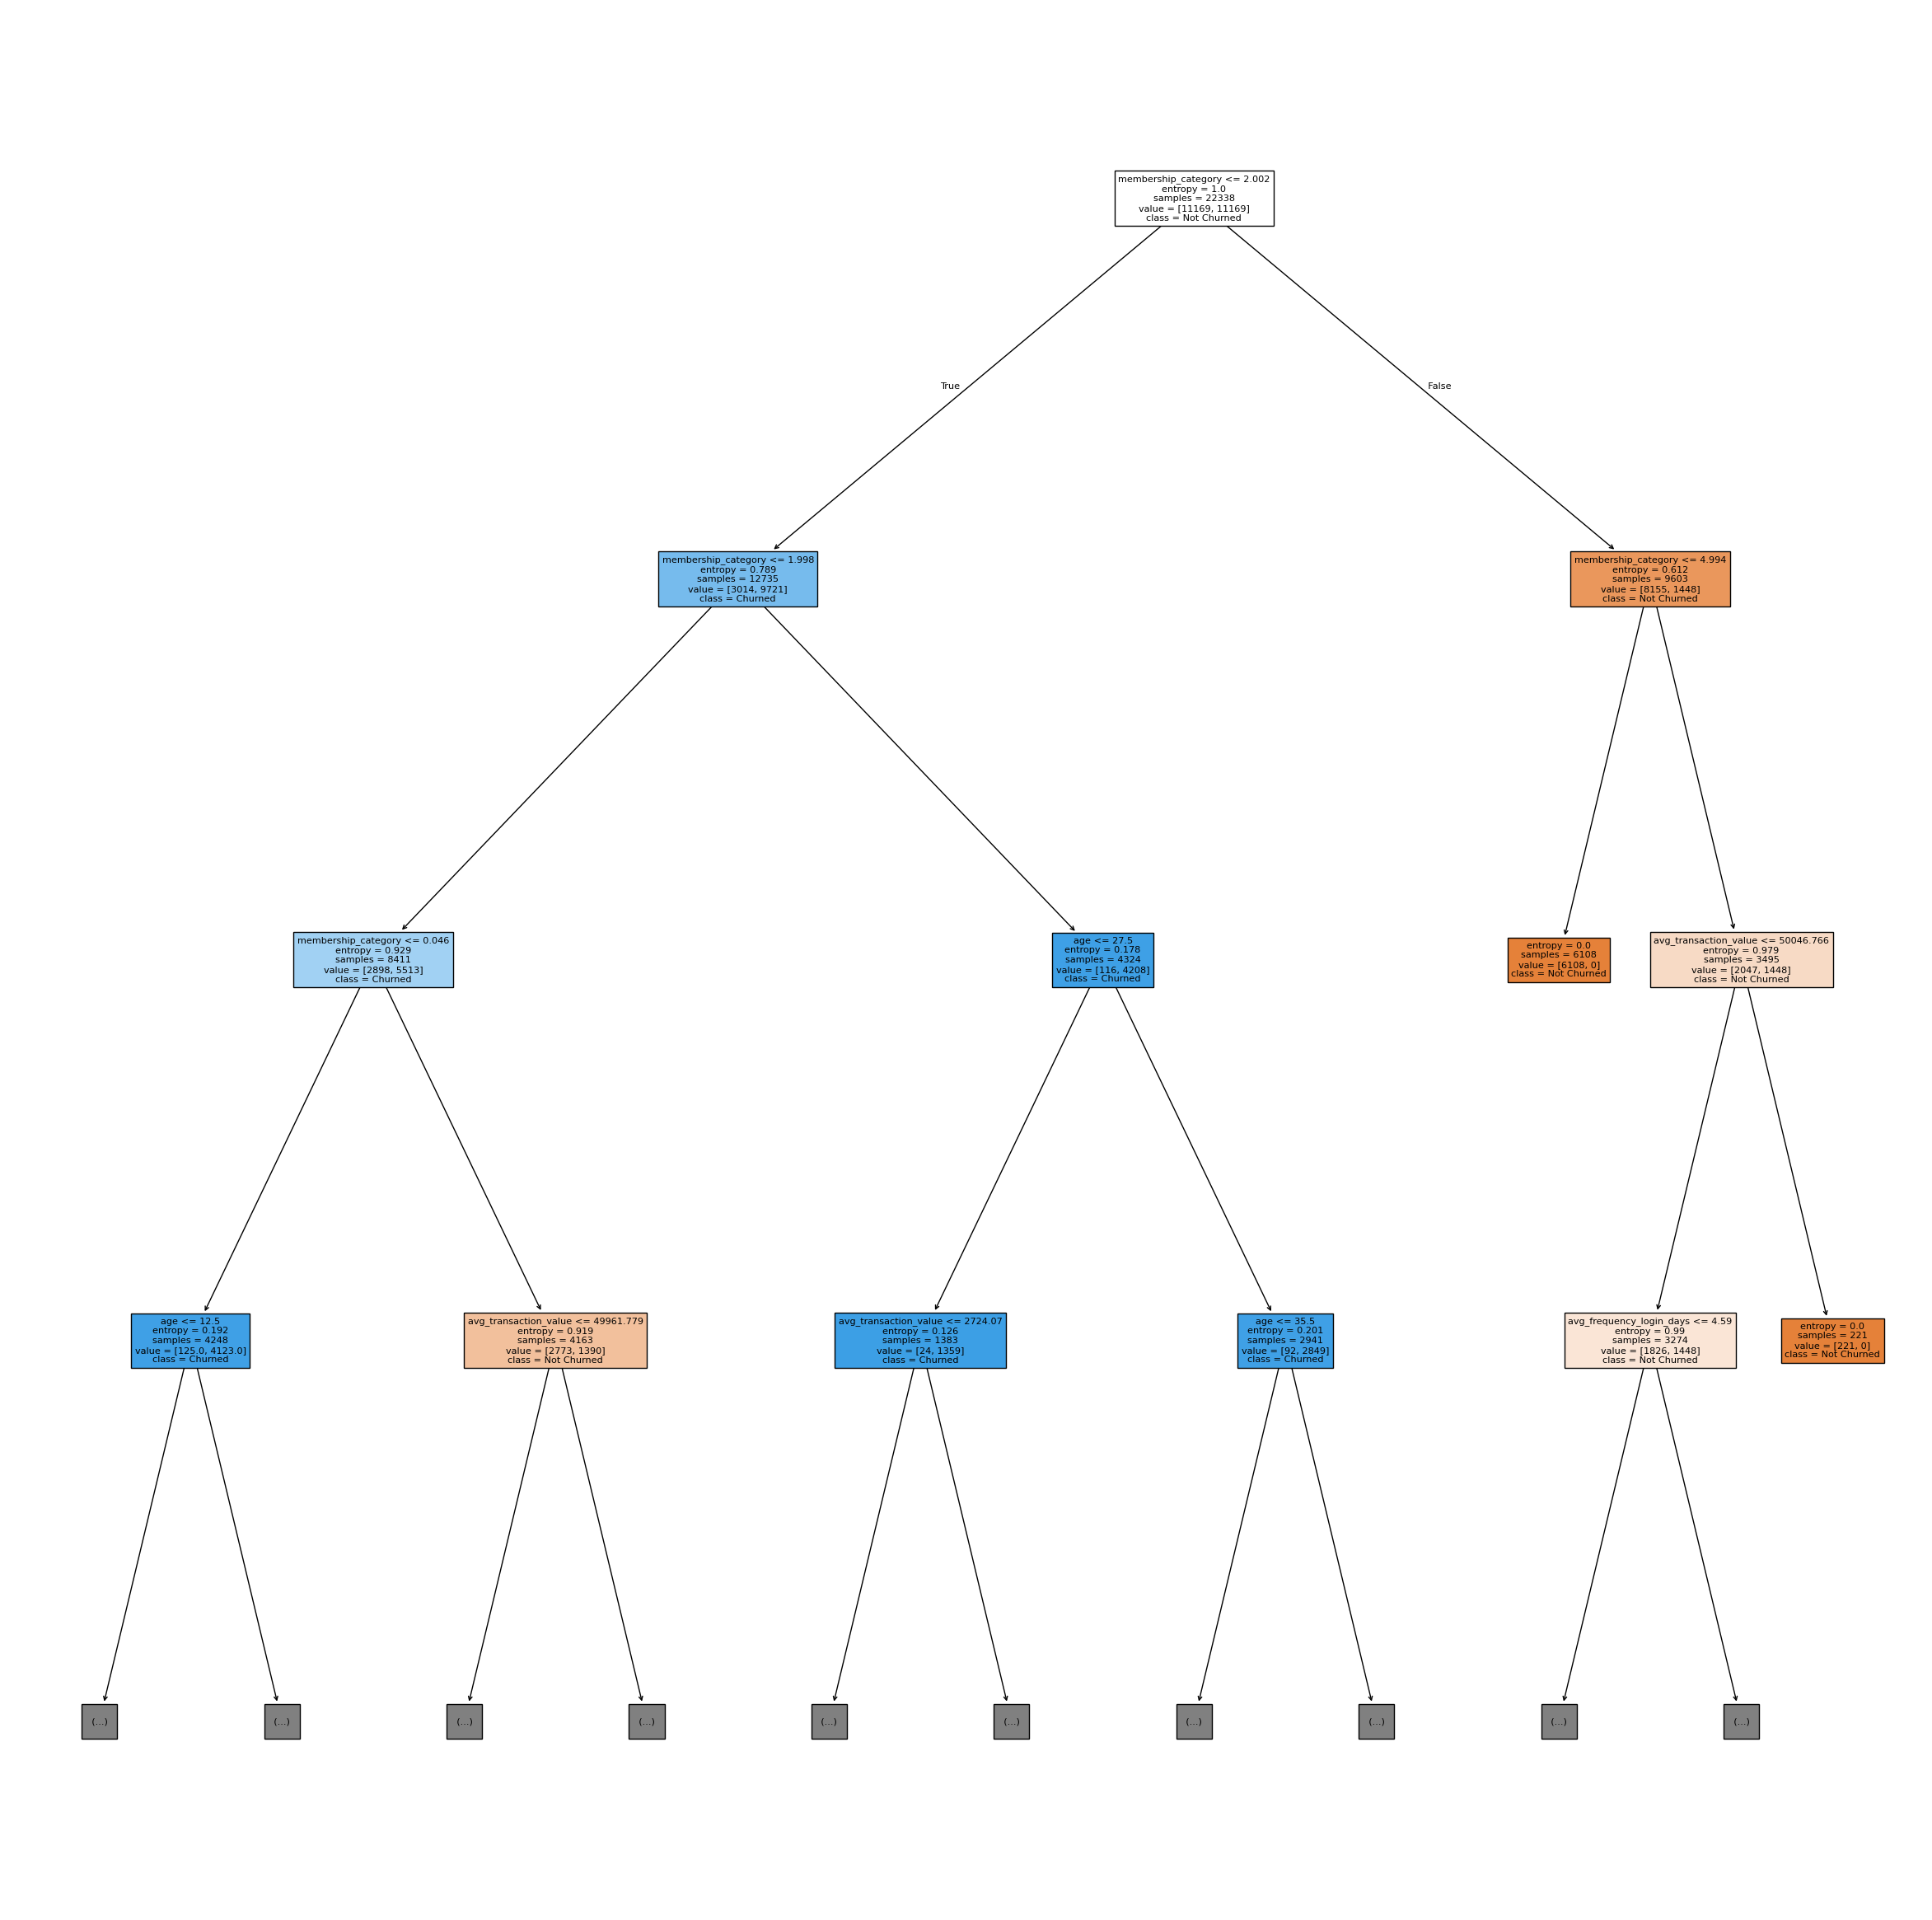

In [86]:
plot_tree(dectree, class_names=['Not Churned', 'Churned'], max_depth=3, figsize=(30, 30), fontsize=30)